<a href="https://colab.research.google.com/github/ssawant/TensorFlow-in-Practice/blob/main/C1W4_Convolution_Neural_Network_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-12-21 03:02:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   162MB/s    in 0.9s    

2020-12-21 03:02:55 (162 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [10]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [17]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

#print(train_horse_names[:10])
#print(train_human_names[:10])

print(f'total training horse image: {len(os.listdir(train_horse_dir))}')
print(f'total training human image: {len(os.listdir(train_horse_dir))}')

total training horse image: 500
total training human image: 500


In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image o/p will be shown as 4*4 configuration
nrows = 4
ncols = 4

# Index for iteration over the image
pic_index = 0

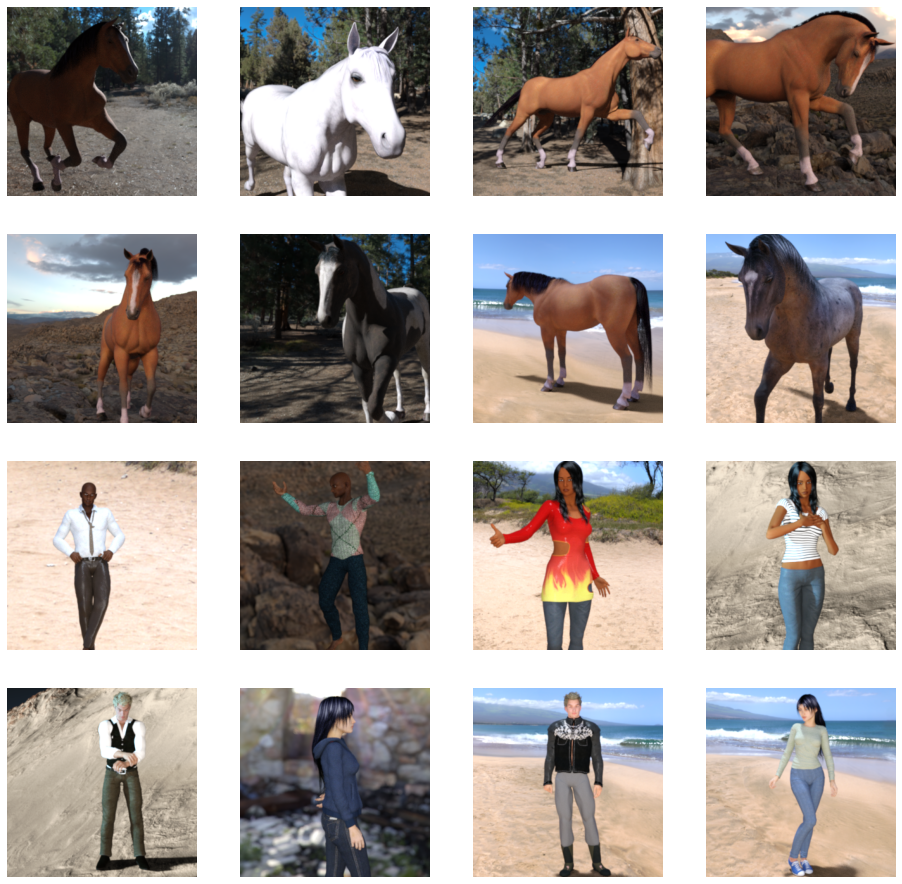

In [20]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [25]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 300x300 with 3 bytes color
  # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [26]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 33, 33, 64)       

In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 (total 8 batch) using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',  # This is the source directory for training images
    target_size=(300, 300),  # All images will be resized to 150x150
    batch_size=128,
    # Since we use binary_crossentropy loss, we need binary labels
    class_mode='binary'
    )

Found 1027 images belonging to 2 classes.


In [31]:
history = model.fit(train_generator, steps_per_epoch=8, epochs=15, verbose=1)

Epoch 1/15
8/8 [==============================] - 78s 9s/step - loss: 1.7651 - accuracy: 0.5534
Epoch 2/15
8/8 [==============================] - 72s 9s/step - loss: 0.7452 - accuracy: 0.6486
Epoch 3/15
8/8 [==============================] - 72s 9s/step - loss: 0.7210 - accuracy: 0.7043
Epoch 4/15
8/8 [==============================] - 72s 9s/step - loss: 0.7043 - accuracy: 0.5358
Epoch 5/15
8/8 [==============================] - 72s 9s/step - loss: 0.4268 - accuracy: 0.8270
Epoch 6/15
8/8 [==============================] - 72s 9s/step - loss: 0.2276 - accuracy: 0.9165
Epoch 7/15
8/8 [==============================] - 72s 9s/step - loss: 0.1877 - accuracy: 0.9415
Epoch 8/15
8/8 [==============================] - 72s 9s/step - loss: 0.2794 - accuracy: 0.8940
Epoch 9/15
8/8 [==============================] - 75s 9s/step - loss: 0.1493 - accuracy: 0.9529
Epoch 10/15
8/8 [==============================] - 72s 9s/step - loss: 0.1785 - accuracy: 0.9339
Epoch 11/15
8/8 [======================

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


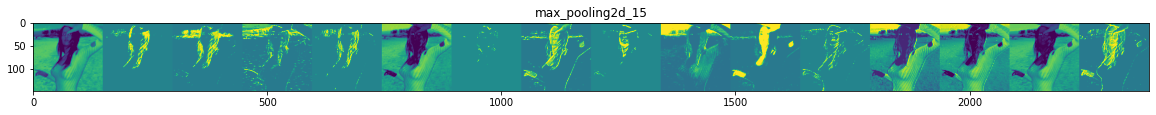

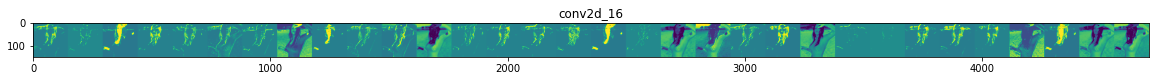

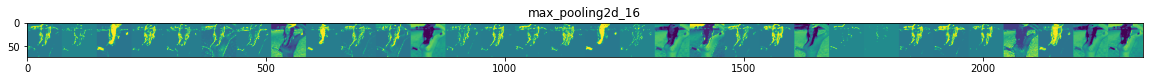

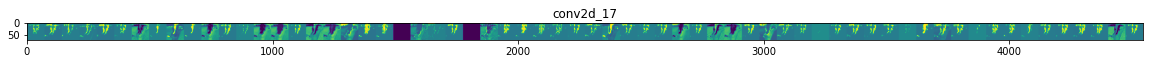

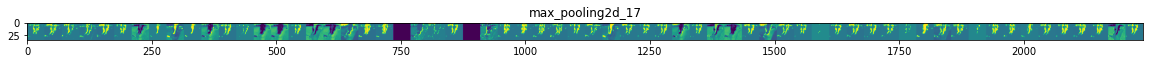

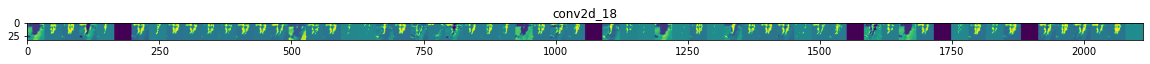

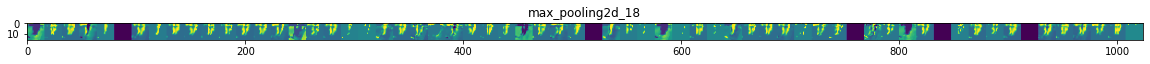

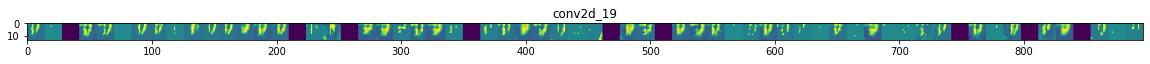

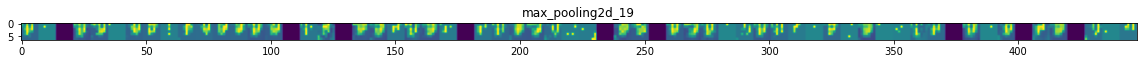

In [38]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
